In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import pandas as pd
from pathlib import Path


In [2]:
import os
os.environ['pRT_input_data_path'] = os.path.join('/home/mvasist/pRT/input_data_paper/input_data')

from petitRADTRANS.retrieval.rebin_give_width import rebin_give_width
from petitRADTRANS.retrieval.data import Data
from petitRADTRANS import Radtrans
from petitRADTRANS import nat_cst as nc


In [3]:
spec = pd.read_csv('unconvolved/rebinned_observation_reprocessed231123.csv', header=0, delimiter = ',')
wfirst = spec['wavelength[um]'].iloc[0]

In [4]:
spec

,wavelength[um],flux[Jy],error[Jy],channels
0,4.909755,0.000301,0.000010,0.0
1,4.914667,0.000395,0.000009,0.0
2,4.919584,0.000302,0.000010,0.0
3,4.924506,0.000507,0.000011,0.0
4,4.929433,0.000332,0.000010,0.0
...,...,...,...,...
1381,17.889679,0.000493,0.000017,8.0
1382,17.907578,0.000503,0.000017,8.0
1383,17.925494,0.000437,0.000017,8.0
1384,17.943429,0.000442,0.000016,8.0


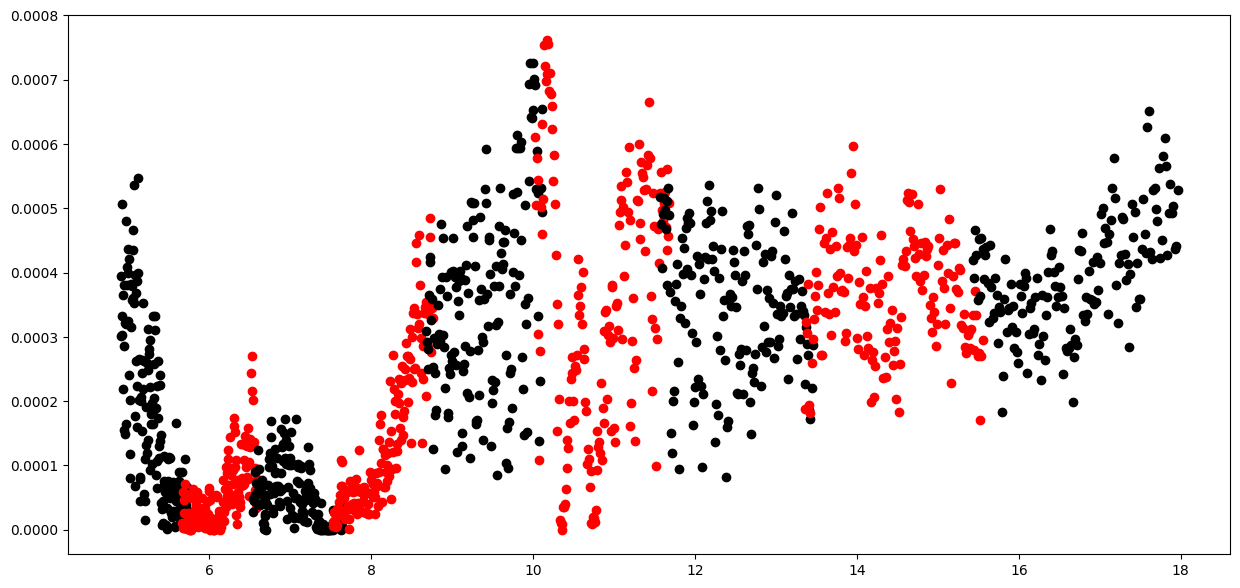

In [7]:
channels = ['1A', '1B', '1C', '2A', '2B', '2C','3A', '3B', '3C']

color = ['red', 'black']
i = 0
a = np.arange(0, len(spec))

plt.figure(figsize=(15,7))

for c, ch in enumerate(channels):
    if i==0:
        i=1
    else:
        i = 0
    ind = a[spec['channels'] == c]
    
    plt.scatter(spec.iloc[ind,0], spec.iloc[ind,1], color= color[i])

In [8]:
wfirst

4.909754603643036

<ErrorbarContainer object of 3 artists>

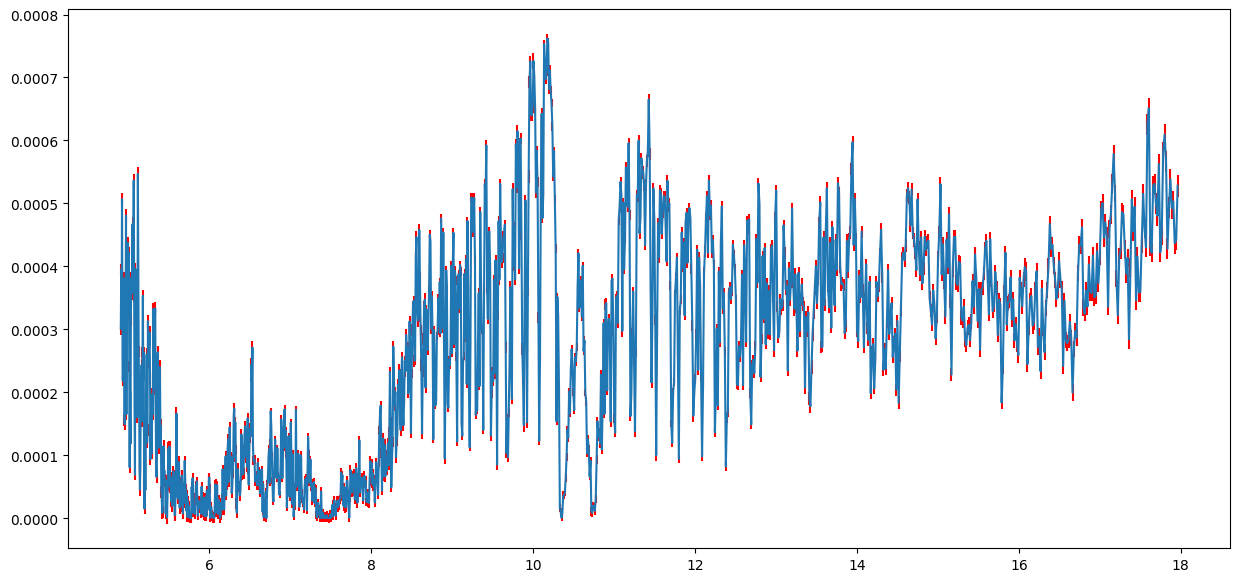

In [32]:
### Only appending if the subsequent wavelengths are bigger than the previous entry. The repeated wls are avgd

Df = pd.DataFrame([spec.iloc[0]])  #[1298]
# newDf = pd.DataFrame([]) # #[1296]

wold = wfirst
for w in spec['wavelength[um]'].iloc[:]:
    if w > wold: 
        a = spec[spec['wavelength[um]'] == w]
        Df = pd.concat([Df, pd.DataFrame([a.mean(axis=0)])], ignore_index=True)
        wold = w
        
Df

Dff = pd.read_csv('unconvolved/spectrum_reprocessed231123.csv', header=0, delimiter = ',')
plt.figure(figsize=(15,7))
plt.errorbar(Df.iloc[:, 0], Df.iloc[:, 1], yerr = Df.iloc[:, 2], ecolor= 'red')


In [31]:
# Found another way to do it.         
# #non-repeated wavelngths 
# wold = wfirst
# wv = [wold]
# for w in spec['wavelength[um]'].iloc[:]:
#     if w > wold: 
#         wv.append(w)
#         wold = w

# ### If there are repeated entries, avg them. 

# newDf = pd.DataFrame([])  #[1298]
# for w in wv:
#     a = spec[spec['wavelength[um]'] == w]
#     newDf = pd.concat([newDf, pd.DataFrame([a.mean(axis=0)])], ignore_index=True)
# newDf.to_csv('spectrum_reprocessed231123_tipsavgd.csv', index=False)

# plt.figure(figsize=(15,7))
# plt.errorbar(newDf.iloc[:, 0], newDf.iloc[:, 1], yerr = newDf.iloc[:, 2], ecolor= 'red')

<ErrorbarContainer object of 3 artists>

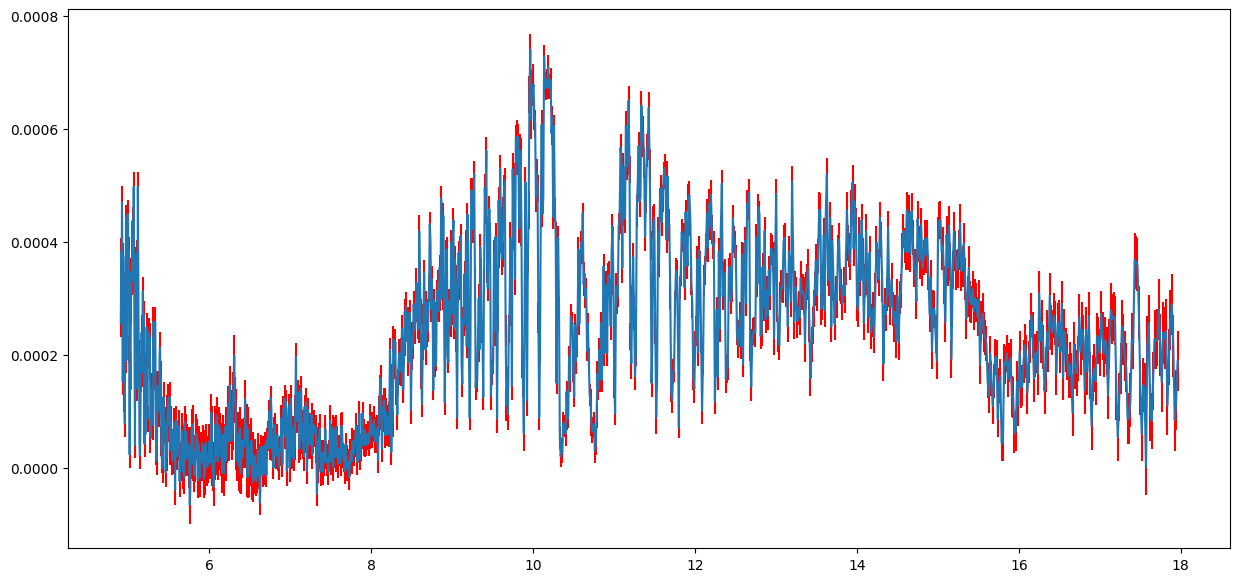

In [17]:
Df1 = pd.read_csv('unconvolved/spectrum.csv', header=0, delimiter = ',')
plt.figure(figsize=(15,7))
plt.errorbar(Df1.iloc[:, 0], Df1.iloc[:, 1], yerr = Df1.iloc[:, 2], ecolor= 'red')

## Next decide the scaling of the observation/training spectra based on its flux!

In [14]:
obs_conv = pd.read_csv('spectrum_conv.csv')

(5.0, 6.0)

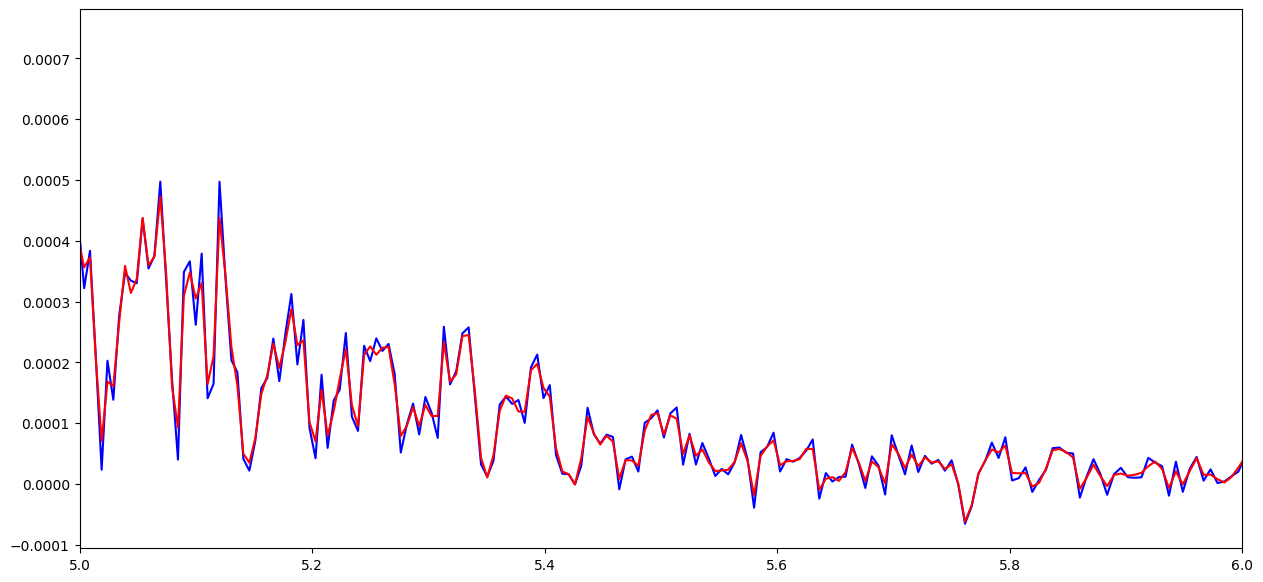

In [22]:
plt.figure(figsize=(15,7))
plt.plot(newDf.iloc[:, 0], newDf.iloc[:, 1], c= 'blue')#, yerr = newDf.iloc[:, 2])#, ecolor= 'red')
plt.plot(obs_conv.iloc[:, 0], obs_conv.iloc[:, 1], c= 'red') #, yerr = obs_conv.iloc[:, 2])#, ecolor= 'orange')
plt.xlim(5, 6)